# EDA

The libraries I am using for the initial reading of the Kaggle State Farm Distracted Driver Detection data are listed below:

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #opencv library
import random
import h5py

import matplotlib.pyplot as plt  #plotting library
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from IPython.display import Image, SVG

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow
from keras import layers, models, optimizers
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model, model_to_dot
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


Enables us to use a dark background for plotting

In [2]:
#plt.style.use('dark_background')

I am using one of Python's magic functions specifically; matplotlib's inline to make my plots neater.

In [3]:
%matplotlib inline

Directory test

In [4]:
os.getcwd()

'/Users/carloswilwayco/dsir_222_wc/capstone/computer_vision_and_distracted_driving'

# Define paths for train, test, & driver_img_list

# Local Machine Path

In [5]:
train_path = './imgs/train/'
test_path = './imgs/test/'
driver_img_list = './driver_imgs_list.csv'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
img_list = pd.read_csv(driver_img_list)

# EXT HDD PATH

train_path = '/Volumes/EXT HDD/dsir_222_wc/capstone/data/imgs/train/'
test_path = '/Volumes/EXT HDD/dsir_222_wc/capstone/data/imgs/test/'
driver_img_list = '/Volumes/EXT HDD/dsir_222_wc/capstone/data/driver_imgs_list.csv'

# Set Constant Values

In [6]:
num_train = 1000
num_test = 1000
img_width = 240
img_height = 240
batch_size = 64
nb_epochs = 10

# EDA

In [7]:
img_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


# Check number of instances that we will train per class and total images in test.

In [8]:
for category in classes:
    i=0
    path = os.path.join(train_path,category)
    for img in os.listdir(path):
           i+=1
    print('# of instances of class {} in Train: {}'.format(category, i))

i=0
for img in os.listdir(test_path):
    i+=1
print('\nTotal # of images in Test: ', i)

# of instances of class c0 in Train: 2489
# of instances of class c1 in Train: 2267
# of instances of class c2 in Train: 2317
# of instances of class c3 in Train: 2346
# of instances of class c4 in Train: 2326
# of instances of class c5 in Train: 2312
# of instances of class c6 in Train: 2325
# of instances of class c7 in Train: 2002
# of instances of class c8 in Train: 1911
# of instances of class c9 in Train: 2129

Total # of images in Test:  79726


# Plot the classes

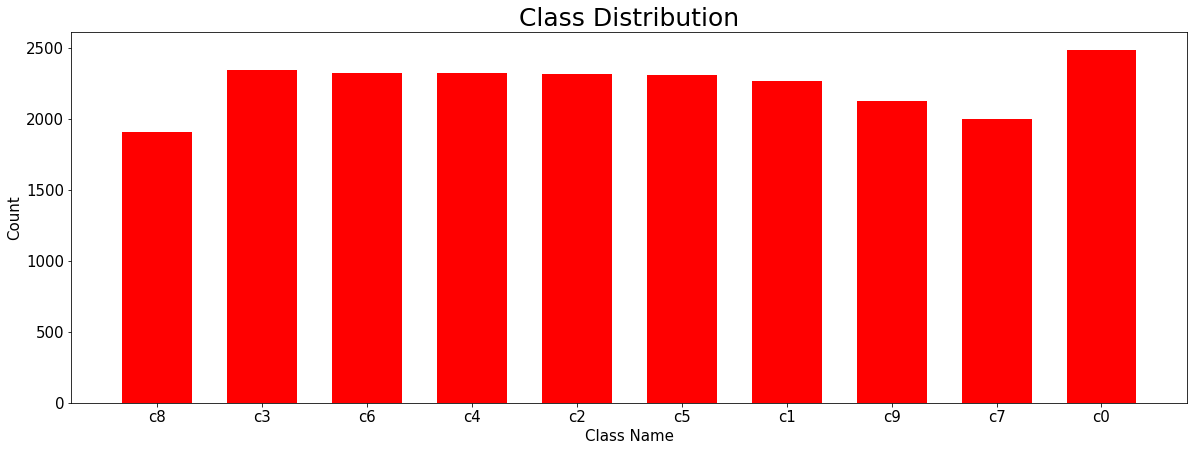

In [9]:
nf = img_list['classname'].value_counts(sort=False)
labels = img_list['classname'].value_counts(sort=False).index.tolist()
y = np.array(nf)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)
ay.bar(x, y, width, color="red")
plt.title('Class Distribution',size=25)
plt.xlabel('Class Name',size=15)
plt.ylabel('Count',size=15)
plt.show()

# These are the various images for the dataset. Using a dictionary, I can define more descriptive titles for the images.

In [10]:
drivers = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking - left', 
                'c5': 'Operating radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking - passenger'}

Checking out sample images per class.

Class  c0 :  Safe driving


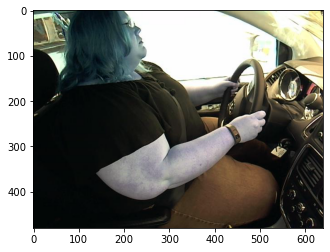



Class  c1 :  Texting - right


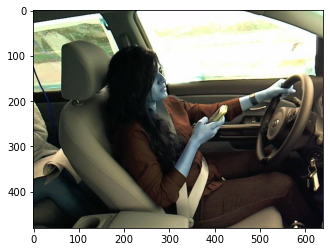



Class  c2 :  Talking - right


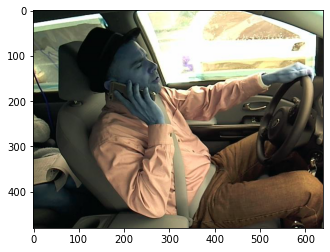



Class  c3 :  Texting - left


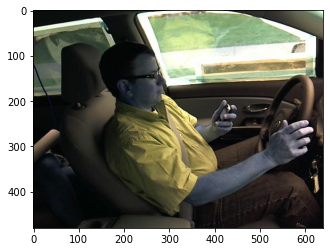



Class  c4 :  Talking - left


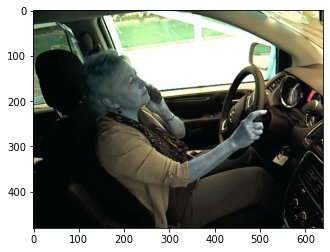



Class  c5 :  Operating radio


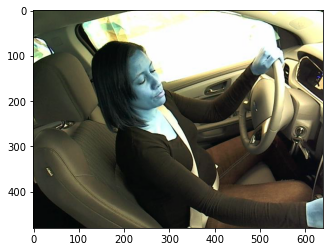



Class  c6 :  Drinking


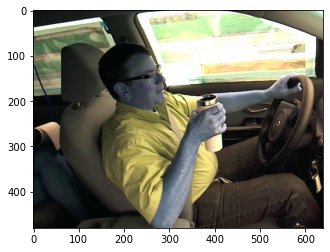



Class  c7 :  Reaching behind


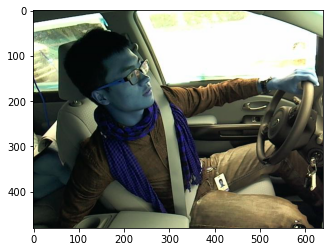



Class  c8 :  Hair and makeup


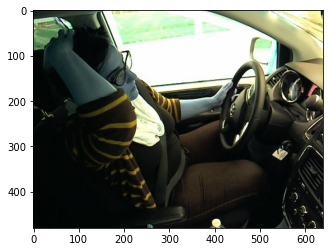



Class  c9 :  Talking - passenger


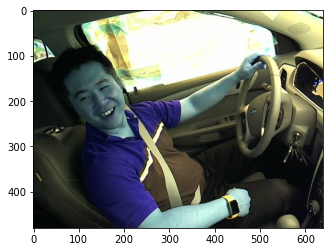

In [11]:
for i in classes:
    path = os.path.join(train_path, i)
    print("Class ", i, ': ', drivers[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)#, #cmap='gray')
        plt.show()
        print('\n')
        break